In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [44]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


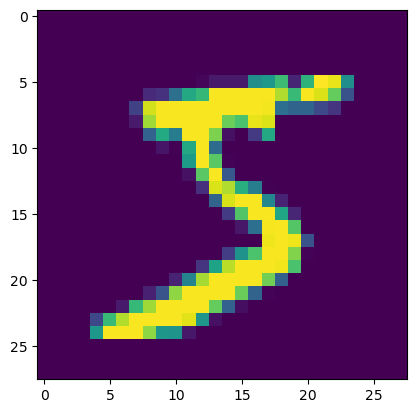

In [41]:
plt.imshow(x_train[0])
print(y_train[0])

In [40]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale= 1./255, input_shape = (28,28,1)),
     tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [35]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [38]:
model.fit(x_train, y_train, batch_size=64, epochs= 10, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0183 - sparse_categorical_accuracy: 0.9948 - val_loss: 0.0788 - val_sparse_categorical_accuracy: 0.9800
Epoch 2/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0151 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.0809 - val_sparse_categorical_accuracy: 0.9795
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0123 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.0850 - val_sparse_categorical_accuracy: 0.9777
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0099 - sparse_categorical_accuracy: 0.9978 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9798
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0082 - sparse_categorical_accuracy: 0.9981 - val_loss: 0.0907 - val_sparse_categorical_accuracy: 0.9783
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0077 - sparse_categorica

In [39]:
model.save('my_model.h5')


In [42]:
test =  model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0954 - sparse_categorical_accuracy: 0.9796


In [43]:
test

[0.09538645297288895, 0.9796000123023987]